In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


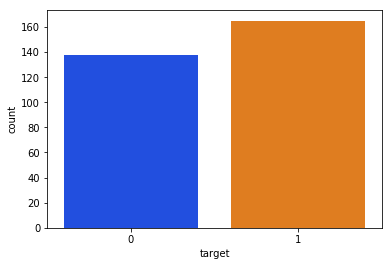

In [3]:
sns.countplot(df['target'], data = df, palette = 'bright')

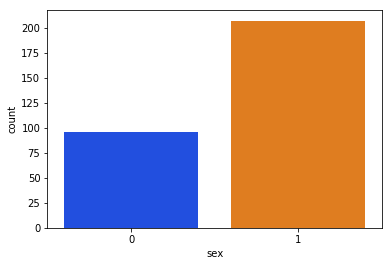

In [4]:
sns.countplot(df['sex'], data = df, palette = 'bright')

In [5]:
no_disease = len(df[df.target ==0])
disease = len(df[df.target == 1])
print('Disease: {:.2f}%'.format(no_disease/len(df['target'])))
print('No disease: {:.2f}%'.format(disease/len(df['target'])))

#can use round(disease, 2)

Disease: 0.46%
No disease: 0.54%


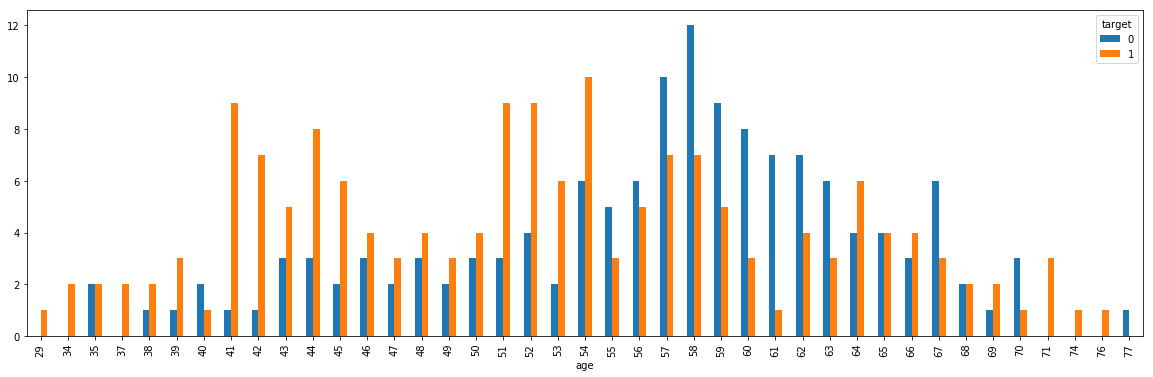

In [6]:
pd.crosstab(df.age, df.target).plot(kind = 'bar', figsize = (20, 6))

(array([0, 1]), <a list of 2 Text xticklabel objects>)

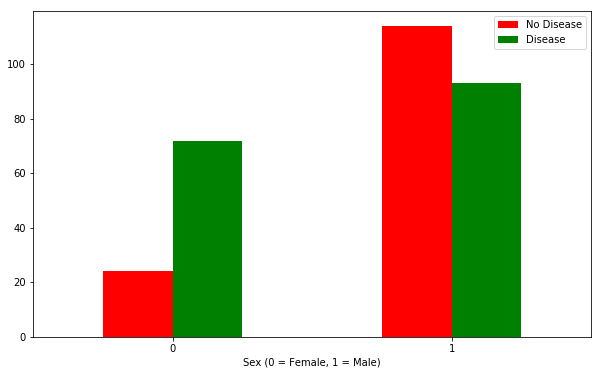

In [7]:
pd.crosstab(df.sex, df.target).plot(kind = 'bar',
                                    figsize = (10, 6),
                                   color = ['red', 'green'])
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.legend(['No Disease', 'Disease'])
plt.xticks(rotation=0)

Text(0, 0.5, 'Max Heart Rate')

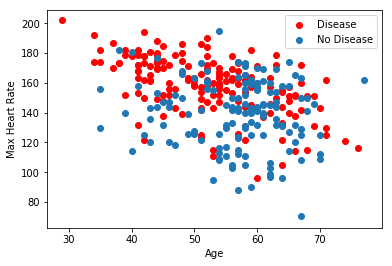

In [8]:
plt.scatter(df.age[df.target ==1], df.thalach[df.target ==1], c = 'r')
plt.scatter(df.age[df.target ==0], df.thalach[df.target ==0])
plt.legend(['Disease', 'No Disease'])
plt.xlabel('Age')
plt.ylabel('Max Heart Rate')

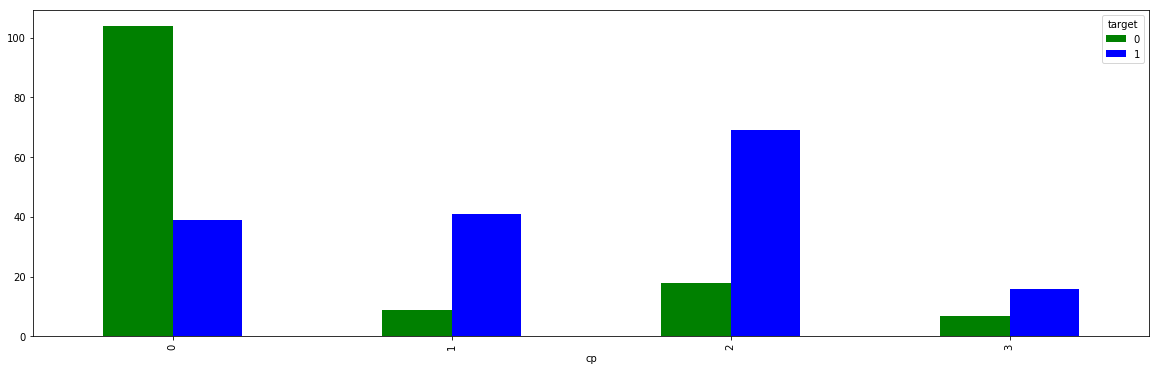

In [9]:
pd.crosstab(df.cp, df.target).plot(kind = 'bar', figsize = (20, 6),
                                  color = ['green', 'blue'])

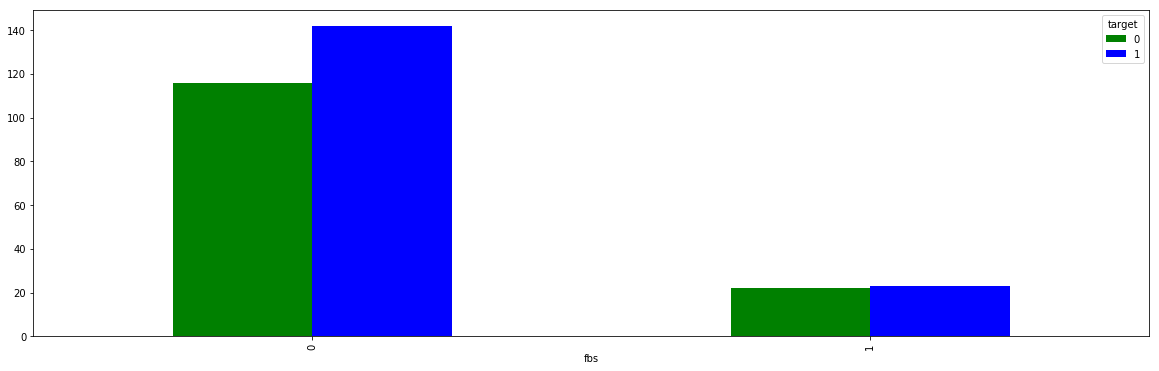

In [10]:
pd.crosstab(df.fbs, df.target).plot(kind = 'bar', figsize = (20, 6),
                                  color = ['green', 'blue'])

In [11]:
X = df.drop('target', axis = 1)
y = df.target

In [12]:
X_train, X_test, y_train, y_test = train_test_split(
                        X, y, test_size = 0.25)

In [13]:
from sklearn.preprocessing import MinMaxScaler
scalerX = MinMaxScaler(feature_range=(0, 1))
X_train[X_train.columns] = scalerX.fit_transform(X_train[X_train.columns])
X_test[X_test.columns] = scalerX.transform(X_test[X_test.columns])

/Users/tl/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/Users/tl/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/tl/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  se

In [14]:
#logistic regression
lor = LogisticRegression()
lor.fit(X_train, y_train)
lor.score(X_train, y_train)

/Users/tl/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8193832599118943

In [15]:
#K-neareast neighbour (KNN) classification
from sklearn.neighbors import KNeighborsClassifier
k = KNeighborsClassifier(n_neighbors = 3)
k.fit(X_train, y_train)
k.score(X_test, y_test)

0.8026315789473685

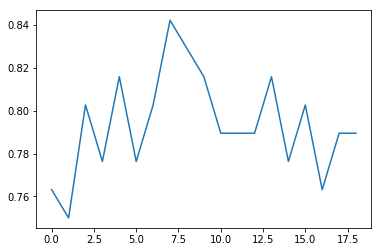

Max Score is:  0.84


In [16]:
scoreList = []
for i in range(1, 20):
    kk = KNeighborsClassifier(n_neighbors = i)
    kk.fit(X_train, y_train)
    scoreList.append(kk.score(X_test, y_test))
plt.plot(scoreList)
plt.show()
print('Max Score is: ', round(max(scoreList), 2))

In [18]:
# Support Vector machine
from sklearn import svm


sv = svm.SVC()
sv.fit(X_train, y_train)
sv.score(X_test, y_test)

/Users/tl/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.8157894736842105

In [19]:
len(X_train)

227

In [20]:
#Naive Bayes Algorithm
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)
nb.score(X_test, y_test)

0.75

In [21]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
dtc.score(X_test, y_test)

0.7368421052631579

In [22]:
from sklearn.ensemble import RandomForestClassifier
rd = RandomForestClassifier()
rd.fit(X_train, y_train)
rd.score(X_test, y_test)

/Users/tl/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.7894736842105263

(0.4, 1)

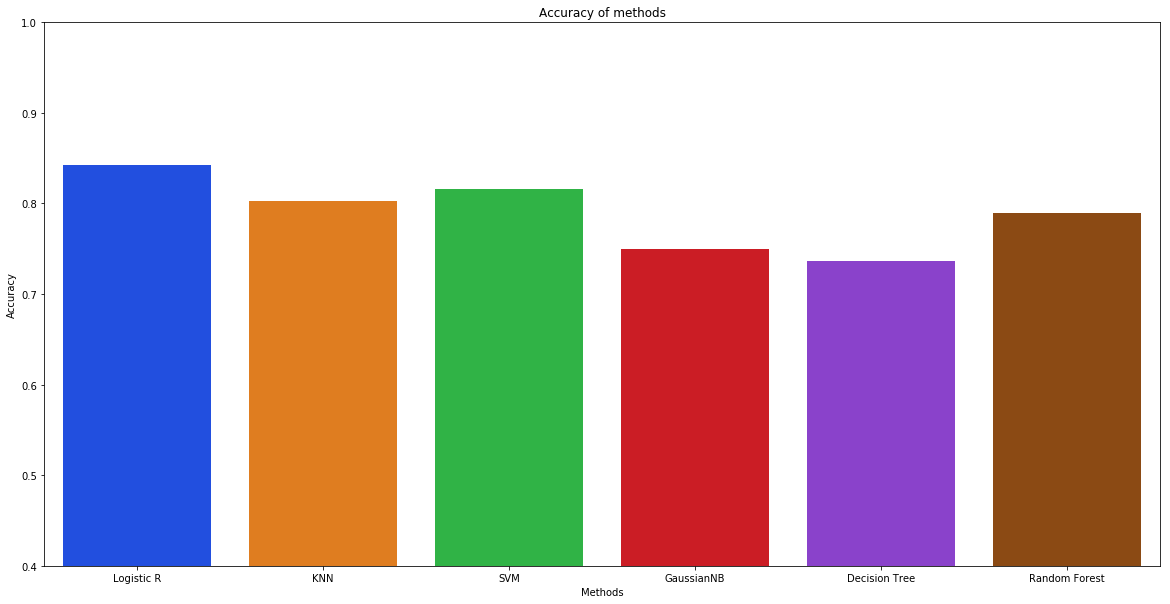

In [23]:
methods = ['Logistic R', 'KNN', 'SVM', 'GaussianNB',
           'Decision Tree', 'Random Forest']
score = [lor.score(X_test, y_test),
        k.score(X_test, y_test),
        sv.score(X_test, y_test),
        nb.score(X_test, y_test),
        dtc.score(X_test, y_test),
        rd.score(X_test, y_test)]
ax, fig = plt.subplots(figsize = (20, 10))
sns.barplot(methods, score, palette = 'bright')
plt.xlabel('Methods')
plt.ylabel('Accuracy')
plt.title('Accuracy of methods')
plt.ylim(0.4, 1)

In [24]:
from sklearn import neighbors, linear_model, svm, naive_bayes, tree, ensemble
classifiers = [neighbors.KNeighborsClassifier(),
              linear_model.LogisticRegression(),
               svm.SVC(),
               naive_bayes.GaussianNB(),
               tree.DecisionTreeClassifier(),
               ensemble.RandomForestClassifier()
              ]
name = ['KNN', 'Logistic', 'SVM', 'GaussianNB',
        'Decision Tree', 'Random Forest']
for item, names in zip(classifiers, name):
    print(names)
    clf = item
    clf.fit(X_train, y_train)
    print(round(clf.score(X_test, y_test), 2))

KNN
0.82
Logistic
0.84
SVM
0.82
GaussianNB
0.75
Decision Tree
0.78
Random Forest
0.82


/Users/tl/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/tl/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/tl/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
